In [2]:
import pandas as pd
import plotly.express as px
import numpy as np
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import silhouette_visualizer
from sklearn.cluster import AgglomerativeClustering


In [3]:
df=pd.read_csv("Cleaned.csv")
df=df.iloc[:,1:]

In [4]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                  WHITE METAL LANTERN         6   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

                  InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00.000000       2.55     17850.0  United Kingdom  
1  2010-12-01 08:26:00.000000       3.39     17850.0  United Kingdom  
2  2010-12-01 08:26:00.000000       2.75     17850.0  United Kingdom  
3  2010-12-01 08:26:00.000000       3.39     17850.0  United Kingdom  
4  2010-12-01 08:26:00.000000       3.39     17850.0  United Kingdom

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397924 non-null  int64  
 1   StockCode    397924 non-null  object 
 2   Description  397924 non-null  object 
 3   Quantity     397924 non-null  int64  
 4   InvoiceDate  397924 non-null  object 
 5   UnitPrice    397924 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      397924 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 24.3+ MB


In [8]:
df.loc[:,'CustomerID']=df.loc[:,'CustomerID'].astype(np.int64)
df.loc[:,'CustomerID']=df.loc[:,'CustomerID'].astype(str)
df.loc[:,'InvoiceDate']=pd.to_datetime(df.loc[:,'InvoiceDate'],format='%Y-%m-%d %H:%M:%S')
df.loc[:,'Agg_price']=df.loc[:,'UnitPrice']*df.loc[:,'Quantity']

### Top 10 Most Frequent Customers

In [10]:
cust_frequency=df.groupby('CustomerID').agg({'InvoiceNo':'count','Agg_price':np.sum}).reset_index().sort_values('InvoiceNo',ascending=False)
top_10_frequent=cust_frequency.iloc[0:10,:].copy()
top_10_frequent.rename({'InvoiceNo':'Count'},axis=1,inplace=True)
total_sold_value=df[['Agg_price']].copy().sum()
top_10_sold_Amt=top_10_frequent['Agg_price'].sum()
pct_sales_top10=top_10_sold_Amt*100/total_sold_value
pct_sales_top10=pct_sales_top10['Agg_price'].round(2)
fig=px.bar(top_10_frequent,x='CustomerID',y='Count', barmode="group", template="plotly_white")
fig.update_xaxes(type='category')
fig.update_layout(title=f'Top 10 Frequent Customers - {pct_sales_top10} % total sales')
fig.show()

### Top 10 highest paying customers (Monetary Value)


In [11]:
cust_monetary=df.groupby('CustomerID').agg({'InvoiceNo':'count','Agg_price':np.sum}).reset_index().sort_values('Agg_price',ascending=False)
top_10_monetary=cust_monetary.iloc[0:10,:].copy()
top_10_monetary.rename({'Agg_price':'Total_Sales'},axis=1,inplace=True)
top_10_sold_Amt=top_10_monetary['Total_Sales'].sum()
pct_sales_top10=top_10_sold_Amt*100/total_sold_value
pct_sales_top10=pct_sales_top10['Agg_price'].round(2)
fig=px.bar(top_10_monetary,x='CustomerID',y='Total_Sales', template="plotly_white", barmode="group")
fig.update_xaxes(type='category')
fig.update_layout(title=f'Top 10 Highest Monetary Valued Customers - {pct_sales_top10} % total sales')
fig.show()

### Top 10 Most Recent Customers

In [14]:
recent_date=df['InvoiceDate'].max()+ datetime.timedelta(days = 1)
df['Days_since']=recent_date-df['InvoiceDate']
df['Days_since']=df['Days_since'].dt.days
cust_recent=df.sort_values('Days_since',ascending=True)
top_10_recent=cust_recent.iloc[0:10,:]
top_10_sold_Amt=top_10_recent['Agg_price'].sum()
pct_sales_top10=top_10_sold_Amt*100/total_sold_value
pct_sales_top10=pct_sales_top10['Agg_price'].round(5)
print(f'Top 10 Recent Customers - {pct_sales_top10} % total sales')
top_10_recent.head(10)

Top 10 Recent Customers - 0.0004 % total sales


InvoiceNo StockCode                          Description  Quantity  \
397923     581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
396437     581414    84997B     CHILDRENS CUTLERY RETROSPOT RED          1   
396438     581414     22757         LARGE RED BABUSHKA NOTEBOOK          2   
396439     581414     21137             BLACK RECORD COVER FRAME         1   
396440     581414     22094             RED RETROSPOT TISSUE BOX         1   
396441     581414     23346                      SPACEBOY BEAKER         1   
396442     581414     23371      SET 36 COLOUR PENCILS SPACEBOY          1   
396443     581414     22327    ROUND SNACK BOXES SET OF 4 SKULLS         1   
396444     581414     20914  SET/5 RED RETROSPOT LID GLASS BOWLS         1   
396445     581414     22326  ROUND SNACK BOXES SET OF4 WOODLAND          1   

               InvoiceDate  UnitPrice CustomerID         Country  Agg_price  \
397923 2011-12-09 12:50:00       4.95      12680          France      14.85   
396437 2011-12-08 14:39:00       4.15      14730  United Kingdom       4.15   
396438 2011-12-08 14:39:00       0.39      14730  United Kingdom       0.78   
396439 2011-12-08 14:39:00       3.75      14730  United Kingdom       3.75   
396440 2011-12-08 14:39:00       0.39      14730  United Kingdom       0.39   
396441 2011-12-08 14:39:00       1.25      14730  United Kingdom       1.25   
396442 2011-12-08 14:39:00       1.25      14730  United Kingdom       1.25   
396443 2011-12-08 14:39:00       2.95      14730  United Kingdom       2.95   
396444 2011-12-08 14:39:00       2.95      14730  United Kingdom       2.95   
396445 2011-12-08 14:39:00       2.95      14730  United Kingdom       2.95   

        Days_since  
397923           1  
396437           1  
396438           1  
396439           1  
396440           1  
396441           1  
396442           1  
396443           1  
396444           1  
396445           1

In [15]:
rfm=df.groupby('CustomerID').agg({'Days_since':'min','InvoiceNo':'count','Agg_price':'sum'}).reset_index()
rfm.rename({'Days_since':'Recency','InvoiceNo':'Frequency','Agg_price':'Monetary_Value'},axis=1,inplace=True)
rfm.head()

CustomerID  Recency  Frequency  Monetary_Value
0      12346      326          1        77183.60
1      12347        2        182         4310.00
2      12348       75         31         1797.24
3      12349       19         73         1757.55
4      12350      310         17          334.40

### Distributions of these metrics
Indicates the metrics deviate from normal distribution and are positively skewed

In [10]:
fig = px.histogram(rfm, x="Recency", 
                   marginal="violin", template="plotly_white",
                   hover_data=rfm.columns)
fig.update_layout(title=f'Recency Distribution')
fig.show()


In [11]:
fig = px.histogram(rfm, x="Frequency", 
                   marginal="violin", template="plotly_white",
                   hover_data=rfm.columns)
fig.update_layout(title=f'Frequency Distribution')
fig.show()

In [12]:
fig = px.histogram(rfm, x="Monetary_Value", 
                   marginal="violin", template="plotly_white",
                   hover_data=rfm.columns)
fig.update_layout(title=f'Monetary Value Distribution')
fig.show()

In [16]:
#Create R_score, F_score, M_score by binning each of the variables into 5 bins
rfm['R_score']=pd.qcut(rfm['Recency'],5,range(5,0,-1))
rfm['F_score']=pd.qcut(rfm['Frequency'],5,labels=range(1,6))
rfm['M_score']=pd.qcut(rfm['Monetary_Value'],5,labels=range(1,6))
rfm['RFM_score']=(rfm['R_score'].astype(int)+rfm['F_score'].astype(int)+rfm['M_score'].astype(int))/3

### Distribution of RFM Score

In [14]:
fig = px.histogram(rfm, x="RFM_score", 
                   marginal="violin", template="plotly_white",
                   hover_data=rfm.columns)
fig.update_layout(title=f'R_score score Distribution')
fig.show()

### Assign Customer Types based on RFM scores

In [18]:
rfm['R_score']=rfm['R_score'].astype(int)
rfm['F_score']=rfm['F_score'].astype(int)
rfm['M_score']=rfm['M_score'].astype(int)

In [19]:
#Champions are your best customers, who bought most recently, most often, and are heavy spenders. Reward these customers. They can become early adopters for new products and will help promote your brand.
#Potential Loyalists are your recent customers with average frequency and who spent a good amount. Offer membership or loyalty programs or recommend related products to upsell them and help them become your Loyalists or Champions.
#New Customers are your customers who have a high overall RFM score but are not frequent shoppers. Start building relationships with these customers by providing onboarding support and special offers to increase their visits.
#At Risk Customers are your customers who are similar to “Can’t lose them but losing” but with smaller monetary and frequency value.. Send them personalized reactivation campaigns to reconnect, and offer renewals and helpful products to encourage another purchase.
#Can’t lose them but losing are customers who made the largest orders, and often. But haven’t returned for a long time. Bring them back with relevant promotions, and run surveys to find out what went wrong and avoid losing them to a competitor.
#https://www.r-bloggers.com/2019/07/customer-segmentation-using-rfm-analysis/
def assign_customer_segment(rfm):
    if rfm['RFM_score']>4:
        return 'Champion'
    elif (rfm['R_score']>=2) and (rfm['R_score']<=4) and (rfm['F_score']>=3)  and (rfm['F_score']<=4)  and (rfm['M_score']>=4) and (rfm['M_score']<=5):
        return 'Loyal'
    elif (rfm['R_score']>=3) and (rfm['R_score']<=5) and (rfm['F_score']>=1)  and (rfm['F_score']<=3)  and (rfm['M_score']>=1) and (rfm['M_score']<=3):
        return 'Potential Loyalists'
    elif (rfm['R_score']>=4) and (rfm['R_score']<=5) and (rfm['F_score']<2) and  (rfm['M_score']<2):
        return 'New Customers'
    elif (rfm['R_score']>=3) and (rfm['R_score']<=4)and (rfm['F_score']<2) and  (rfm['M_score']<2):
        return 'Promising'
    elif (rfm['R_score']>=3) and (rfm['R_score']<=4) and (rfm['F_score']>=3)  and (rfm['F_score']<=4)  and (rfm['M_score']>=3) and (rfm['M_score']<=4):
        return 'Need Attention'
    elif (rfm['R_score']>=2) and (rfm['R_score']<=3)and (rfm['F_score']<3)  and (rfm['M_score']<3):
        return 'About to sleep'
    elif (rfm['R_score']<2) and (rfm['F_score']>=4)  and (rfm['F_score']<=5)  and (rfm['M_score']>=4) and (rfm['M_score']<=5):
        return 'Cant afford to lose them'
    elif (rfm['R_score']<3) and (rfm['F_score']>=2)  and (rfm['F_score']<=5)  and (rfm['M_score']>=2) and (rfm['M_score']<=5):
        return 'At risk'
    elif (rfm['R_score']>=2) and (rfm['R_score']<=3) and (rfm['F_score']>=2)  and (rfm['F_score']<=3)  and (rfm['M_score']>=2) and (rfm['M_score']<=3):
        return 'Hibernating'
    elif (rfm['R_score']<2) and  (rfm['F_score']<2)  and (rfm['M_score']<2):
        return 'Lost'
    else:
        return 'Core'

In [20]:
rfm['Customer_Segment']=rfm.apply(assign_customer_segment,axis=1)

In [21]:
fig = px.treemap(rfm, path=['Customer_Segment'],
                  color_continuous_scale='RdBu')
fig.update_layout(title=f'Customer Segments by RFM')
fig.show()

In [22]:
fig = px.scatter_3d(rfm, x='Recency', y='Frequency', z='Monetary_Value', color='Customer_Segment',template="plotly_white",
               size_max=10, opacity=0.6)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

### RFM By Using Clustering Techniques

In [94]:
rfm[rfm['Customer_Segment']=='Core']

CustomerID  Recency  Frequency  Monetary_Value  R_score  F_score  \
0         12346      326          1        77183.60        1        1   
8         12355      214         13          459.40        1        1   
11        12358        2         19         1168.06        5        2   
23        12373      311         14          364.60        1        1   
33        12386      338         10          401.90        1        1   
...         ...      ...        ...             ...      ...      ...   
4277      18204       71        200         1993.70        3        5   
4282      18212      326         43          248.42        1        3   
4283      18213      237         15          232.48        1        2   
4289      18220      227          2          305.28        1        1   
4302      18233      326          1          440.00        1        1   

      M_score  RFM_score Customer_Segment  
0           5   2.333333             Core  
8           2   1.333333             Core  
11          4   3.666667             Core  
23          2   1.333333             Core  
33          2   1.333333             Core  
...       ...        ...              ...  
4277        4   4.000000             Core  
4282        1   1.666667             Core  
4283        1   1.333333             Core  
4289        2   1.333333             Core  
4302        2   1.333333             Core  

[568 rows x 9 columns]

In [95]:
cols=list(rfm.columns)

In [96]:
list(rfm.select_dtypes('float').columns)

['Monetary_Value', 'RFM_score']

### Log Transformed and Standardize the metrics

In [21]:
rfm.describe()

Recency    Frequency  Monetary_Value    RFM_score
count  4339.000000  4339.000000     4339.000000  4339.000000
mean     92.518322    91.708689     2053.793017     2.998079
std     100.009747   228.792852     8988.248381     1.196819
min       1.000000     1.000000        0.000000     1.000000
25%      18.000000    17.000000      307.245000     2.000000
50%      51.000000    41.000000      674.450000     3.000000
75%     142.000000   100.000000     1661.640000     4.000000
max     374.000000  7847.000000   280206.020000     5.000000

In [22]:
autoscaler  = StandardScaler()
rfm['recency_log'] = rfm['Recency'].apply(np.log)
rfm['frequency_log'] = rfm['Frequency'].apply(np.log)
rfm['Monetary_Value_log'] = rfm['Monetary_Value'].apply(np.log)
features=['recency_log_std','frequency_log_std','Monetary_Value_log_std']
#bad_indices = np.where(np.isinf(rfm))
#print(bad_indices)
rfm =rfm[~rfm.isin([np.nan, np.inf, -np.inf]).any(1)]
X_std= autoscaler.fit_transform(rfm[['recency_log','frequency_log','Monetary_Value_log']])
rfm_scaled=pd.DataFrame(X_std,columns=features)
rfm_scaled=pd.concat([rfm,rfm_scaled],axis=1)

In [23]:
bad_indices=np.where(np.isnan(rfm_scaled[features]))
print(bad_indices)
rfm_scaled.dropna(inplace=True)

(array([4338, 4338, 4338], dtype=int64), array([0, 1, 2], dtype=int64))


### Elbow plot to find best K 

In [25]:
X=rfm_scaled[features]

distorsions = [] # create an empty list named distorsions

for k in range(1, 20): # we will fit multple k-means (from k = 2 to k = 30)
    kmeans = KMeans(n_clusters=k) # creates a k-means instance
    kmeans.fit(X) # fits k-means
    distorsions.append(kmeans.inertia_) # saves the distorsions

fig = px.line(x=range(1,20), y=distorsions,template="plotly_white", title='Elbow Curve')
fig.show()

### Run K-Means for n=3 and assign values to original dataframe. 

Silhouette plot to judge how tight clusters are

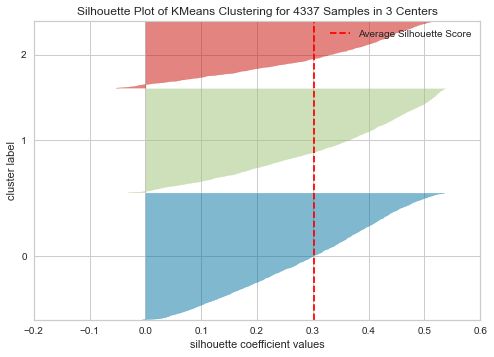

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 4337 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=3, random_state=110))

In [39]:
kmeans_model=KMeans(n_clusters=3)
kmeans_model.fit(X)
rfm_scaled['K_Cluster'] = kmeans_model.labels_
silhouette_visualizer(KMeans(3, random_state=110), X, colors='yellowbrick')


In [43]:
print(f' Silhouette score {silhouette_score(X,kmeans_model.labels_)}')

 Silhouette score 0.30311561597435


In [27]:
rfm_scaled['K_Cluster']=rfm_scaled['K_Cluster'].astype(str)
rfm_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4337 entries, 0 to 4337
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   CustomerID              4337 non-null   object  
 1   Recency                 4337 non-null   float64 
 2   Frequency               4337 non-null   float64 
 3   Monetary_Value          4337 non-null   float64 
 4   R_score                 4337 non-null   category
 5   F_score                 4337 non-null   category
 6   M_score                 4337 non-null   category
 7   RFM_score               4337 non-null   float64 
 8   recency_log             4337 non-null   float64 
 9   frequency_log           4337 non-null   float64 
 10  Monetary_Value_log      4337 non-null   float64 
 11  recency_log_std         4337 non-null   float64 
 12  frequency_log_std       4337 non-null   float64 
 13  Monetary_Value_log_std  4337 non-null   float64 
 14  K_Cluster               

In [28]:
fig = px.scatter_3d(rfm_scaled, x='recency_log', y='frequency_log', z='Monetary_Value_log',color='K_Cluster', template="plotly_white",
               size_max=10, opacity=0.6)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

### Hierarchical Clustering

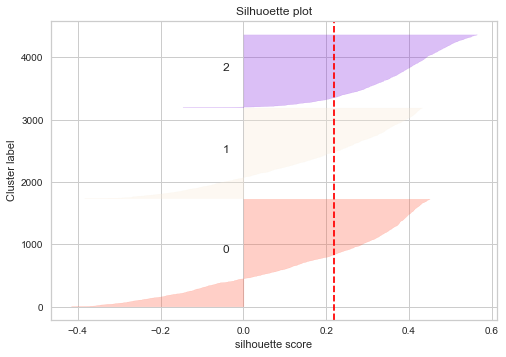

In [44]:
import matplotlib.pyplot as plt
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

cluster_labels = cluster.fit_predict(X)
colorlist =["tomato","antiquewhite","blueviolet","cornflowerblue","darkgreen","seashell","skyblue","mediumseagreen"]
#Calculate the average of silhouette scores
silhouette_avg = silhouette_score(X,cluster_labels)
n_clusters=3
#Calculate the silhouette score for each data
each_silhouette_score = silhouette_samples(X,cluster_labels,metric="euclidean")
fig =plt.figure()
ax = fig.add_subplot(1,1,1)
y_lower =10
for i in range(n_clusters):
    ith_cluster_silhouette_values = each_silhouette_score[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = colorlist[i]
    ax.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.3)
    
    #label the silhouse plots with their cluster numbers at the middle
    ax.text(-0.05,y_lower + 0.5 * size_cluster_i,str(i))
    
    #compute the new y_lower for next plot
    y_lower = y_upper +10 
    
ax.set_title("Silhuoette plot")
ax.set_xlabel("silhouette score")
ax.set_ylabel("Cluster label")
    
#the vertical line for average silhouette score of all the values
ax.axvline(x=silhouette_avg,color="red",linestyle="--")

In [45]:
print("Silhouette Coefficient: %0.3f"
      %silhouette_avg)


Silhouette Coefficient: 0.219


In [31]:
# import scipy.cluster.hierarchy as shc

# plt.figure(figsize=(10, 7))
# plt.title("Customer Dendograms")
# dend = shc.dendrogram(shc.linkage(X, method='average'))

### DB Scan Clustering



In [32]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [33]:
# Compute DBSCAN
#min sample = D+1 i.e. 4
db = DBSCAN(eps=0.3, min_samples=67).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))


Estimated number of clusters: 3
Estimated number of noise points: 2766
Silhouette Coefficient: -0.167


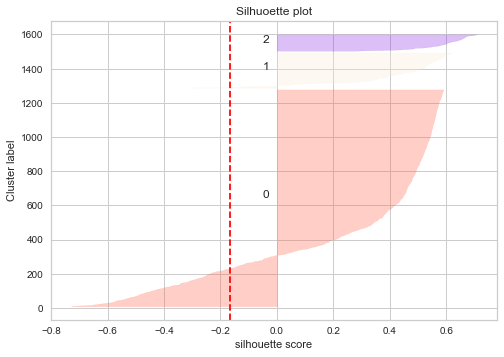

In [34]:
cluster_labels = db.fit_predict(X)
colorlist =["tomato","antiquewhite","blueviolet","cornflowerblue","darkgreen","seashell","skyblue","mediumseagreen"]
#Calculate the average of silhouette scores
silhouette_avg = silhouette_score(X,cluster_labels)
n_clusters=3
#Calculate the silhouette score for each data
each_silhouette_score = silhouette_samples(X,cluster_labels,metric="euclidean")
fig =plt.figure()
ax = fig.add_subplot(1,1,1)
y_lower =10
for i in range(n_clusters):
    ith_cluster_silhouette_values = each_silhouette_score[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = colorlist[i]
    ax.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.3)
    
    #label the silhouse plots with their cluster numbers at the middle
    ax.text(-0.05,y_lower + 0.5 * size_cluster_i,str(i))
    
    #compute the new y_lower for next plot
    y_lower = y_upper +10 
    
ax.set_title("Silhuoette plot")
ax.set_xlabel("silhouette score")
ax.set_ylabel("Cluster label")
    
#the vertical line for average silhouette score of all the values
ax.axvline(x=silhouette_avg,color="red",linestyle="--")


In [35]:
rfm_scaled['db_cluster']=db.labels_
rfm_scaled['db_cluster']=rfm_scaled['db_cluster'].astype(str)
fig = px.scatter_3d(rfm_scaled, x='recency_log', y='frequency_log', z='Monetary_Value_log',color='db_cluster', template="plotly_white",
               size_max=10, opacity=0.6)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

### Snake Plot
A snake plot, or line chart, is a market research technique to compare different segments and visually present the attributes of each cluster.

#### K means gave the best silhouette score, using it for the Snake Plot

In [118]:
rfm_scaled.head()
rfm_scaled_cpy=rfm_scaled[['CustomerID','recency_log','frequency_log','Monetary_Value_log','Customer_Segment','K_Cluster']].copy()
rfm_melt=pd.melt(rfm_scaled_cpy,id_vars=['CustomerID','Customer_Segment','K_Cluster'],var_name = 'Metrics',value_name='Value')
rfm_melt.head()

CustomerID Customer_Segment K_Cluster      Metrics     Value
0      12346             Core         2  recency_log  5.786897
1      12347         Champion         1  recency_log  0.693147
2      12348            Loyal         2  recency_log  4.317488
3      12349            Loyal         2  recency_log  2.944439
4      12350          At risk         0  recency_log  5.736572

It seems that the some of the Customer Segments of RFM are combined and rearranged in K-means

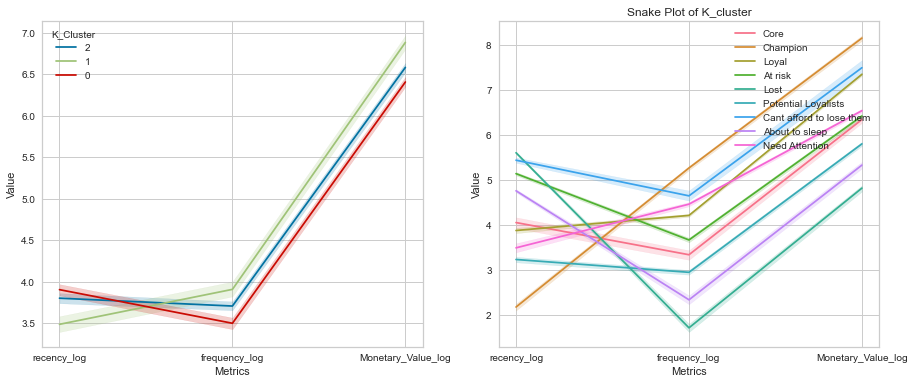

In [119]:
import seaborn as sns
fig,ax=plt.subplots(1,2,figsize=(15,6))
# a snake plot with RFM
sns.lineplot(x = 'Metrics', y = 'Value', hue = 'Customer_Segment', data = rfm_melt,ax=ax[1])
plt.title('Snake Plot of RFM')
plt.legend(loc = 'upper right')

# a snake plot with K-Means
sns.lineplot(x = 'Metrics', y = 'Value', hue = 'K_Cluster', data = rfm_melt,ax=ax[0])
plt.title('Snake Plot of K_cluster')
plt.legend(loc = 'upper right')

In [120]:
# the mean value for each cluster
levelcluster_avg = rfm_scaled_cpy.groupby('Customer_Segment').mean()
levelcluster_avg.head()

recency_log  frequency_log  Monetary_Value_log
Customer_Segment                                                        
About to sleep               4.762532       2.339999            5.333516
At risk                      5.143827       3.670208            6.424839
Cant afford to lose them     5.442637       4.650685            7.497854
Champion                     2.179529       5.270041            8.156189
Core                         4.056807       3.341609            6.346374

### Heat Map
Gives the relative importance of attributes for each cluster / segment

In [122]:
# the mean value in total 
total_avg = rfm_scaled_cpy.iloc[:, 1:4].mean()
total_avg

recency_log           3.767535
frequency_log         3.679811
Monetary_Value_log    6.590569
dtype: float64

In [123]:
prop_rfm = levelcluster_avg/total_avg - 1
prop_rfm

recency_log  frequency_log  Monetary_Value_log
Customer_Segment                                                        
About to sleep               0.264098      -0.364098           -0.190735
At risk                      0.365303      -0.002609           -0.025147
Cant afford to lose them     0.444615       0.263838            0.137664
Champion                    -0.421497       0.432150            0.237555
Core                         0.076780      -0.091907           -0.037052
Lost                         0.488548      -0.533238           -0.268320
Loyal                        0.029990       0.145633            0.115379
Need Attention              -0.072347       0.213572           -0.007169
Potential Loyalists         -0.141081      -0.197995           -0.119094

[]

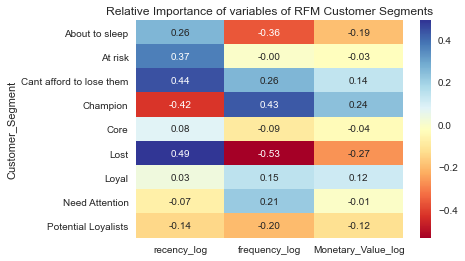

In [130]:
sns.heatmap(prop_rfm, cmap= 'RdYlBu', fmt= '.2f', annot = True)
plt.title('Relative Importance of variables of RFM Customer Segments')
plt.plot()

In [124]:
# the mean value for each cluster
Kcluster_avg = rfm_scaled_cpy.groupby('K_Cluster').mean()

# the proportional mean value
prop_rfm_K = Kcluster_avg/total_avg - 1
prop_rfm_K

recency_log  frequency_log  Monetary_Value_log
K_Cluster                                                
0             0.036485      -0.048956           -0.027587
1            -0.074486       0.062137            0.044798
2             0.009167       0.007502           -0.000896

[]

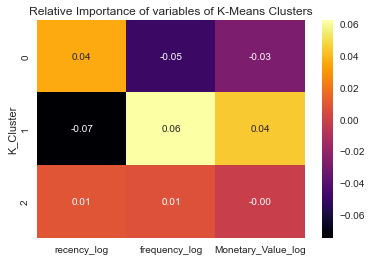

In [131]:
sns.heatmap(prop_rfm_K, cmap= 'inferno', fmt= '.2f', annot = True)
plt.title('Relative Importance of variables of K-Means Clusters')
plt.plot()